<a href="https://colab.research.google.com/github/vinayakjoshi135/python--retail-sales-data-/blob/main/Retail_Sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn import metrics
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
rcParams['figure.figsize']= 8,6


In [ ]:
df = pd.read_excel('/content/retail_sales_data.xlsx')  # Replace with your uploaded filename
df.head()


,store_id,monthly_sales,advertising_budget,store_size_sqft,number_of_employees,location_type,competitor_distance_km,customer_satisfaction,average_product_price,season
0,Store_110,41178.567179,6591.955379,3211.417253,7,Rural,0.719401,3.937318,40.442462,Spring
1,Store_127,34520.803171,1152.923494,2190.864486,5,Rural,0.294532,3.440369,48.004826,Fall
2,Store_67,37589.540992,3029.813958,3387.802495,6,Rural,3.480758,4.793444,19.707883,Winter
3,Store_99,49498.868795,8211.491057,3494.443079,6,Urban,2.297005,3.641418,14.599941,Spring
4,Store_18,41530.212588,8879.138464,2205.889789,8,Suburban,3.658153,4.269112,14.192220,Winter


In [ ]:
df.isnull().sum()

,0
store_id,0
monthly_sales,0
advertising_budget,0
store_size_sqft,0
number_of_employees,0
location_type,0
competitor_distance_km,0
customer_satisfaction,0
average_product_price,0
season,0


In [ ]:
df.head()

,store_id,monthly_sales,advertising_budget,store_size_sqft,number_of_employees,location_type,competitor_distance_km,customer_satisfaction,average_product_price,season
0,Store_110,41178.567179,6591.955379,3211.417253,7,Rural,0.719401,3.937318,40.442462,Spring
1,Store_127,34520.803171,1152.923494,2190.864486,5,Rural,0.294532,3.440369,48.004826,Fall
2,Store_67,37589.540992,3029.813958,3387.802495,6,Rural,3.480758,4.793444,19.707883,Winter
3,Store_99,49498.868795,8211.491057,3494.443079,6,Urban,2.297005,3.641418,14.599941,Spring
4,Store_18,41530.212588,8879.138464,2205.889789,8,Suburban,3.658153,4.269112,14.192220,Winter


In [ ]:
df.tail()

,store_id,monthly_sales,advertising_budget,store_size_sqft,number_of_employees,location_type,competitor_distance_km,customer_satisfaction,average_product_price,season
995,Store_41,40519.670386,4939.228978,3222.060402,4,Rural,2.446391,4.195869,16.342078,Fall
996,Store_58,50007.271102,8599.611349,4362.116158,9,Suburban,0.220707,4.446495,23.333747,Spring
997,Store_63,42945.995852,3148.162703,3590.798195,7,Rural,1.419146,3.110274,33.332929,Summer
998,Store_71,46473.373166,5755.081400,3654.625883,7,Suburban,3.712980,4.199125,31.494682,Fall
999,Store_133,39757.053129,8449.393426,1316.442291,4,Suburban,4.735058,3.525101,20.558465,Summer


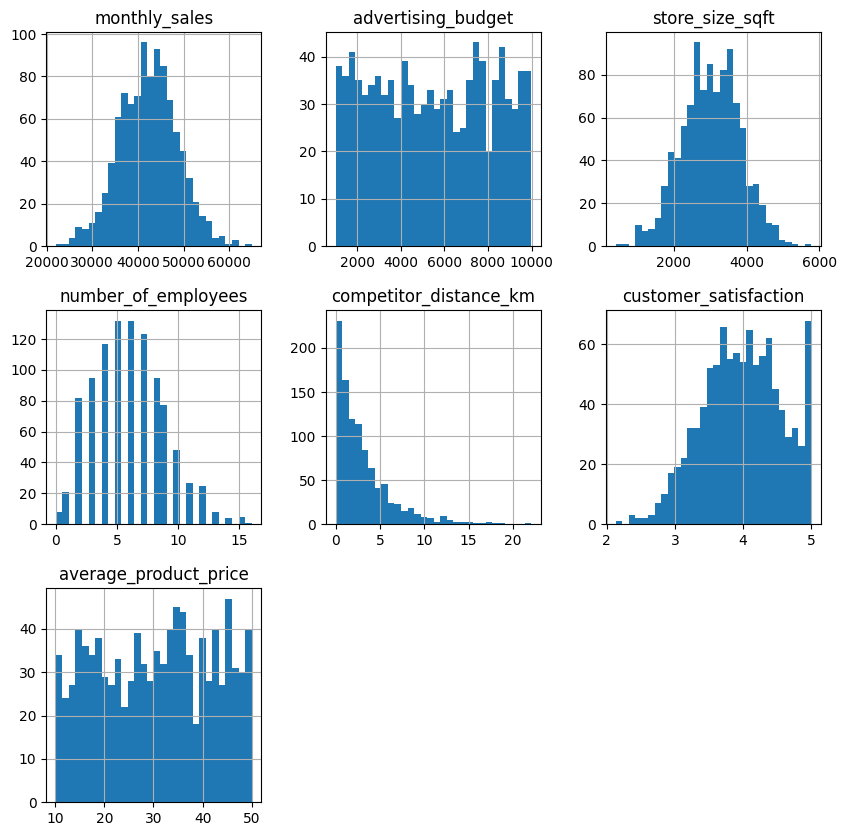

In [ ]:
# Add this import
import matplotlib.pyplot as plt
for col in df.columns:
  if df[col].isnull().sum()>0:
    df[col]=df[col].fillna(df[col].mean())

df.isnull().sum()

df.hist(bins=30, figsize=(10,10))
plt.show()

Frequency of Store Location Types

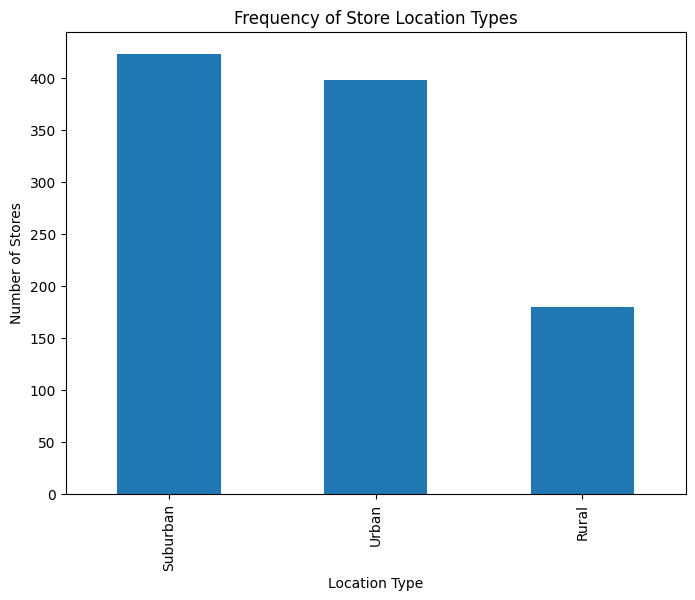

In [ ]:
pd.Series(df['location_type']).value_counts().plot(kind='bar')
plt.title("Frequency of Store Location Types")
plt.xlabel("Location Type")
plt.ylabel("Number of Stores")
plt.show()

 Top 10 Stores by Monthly Sales

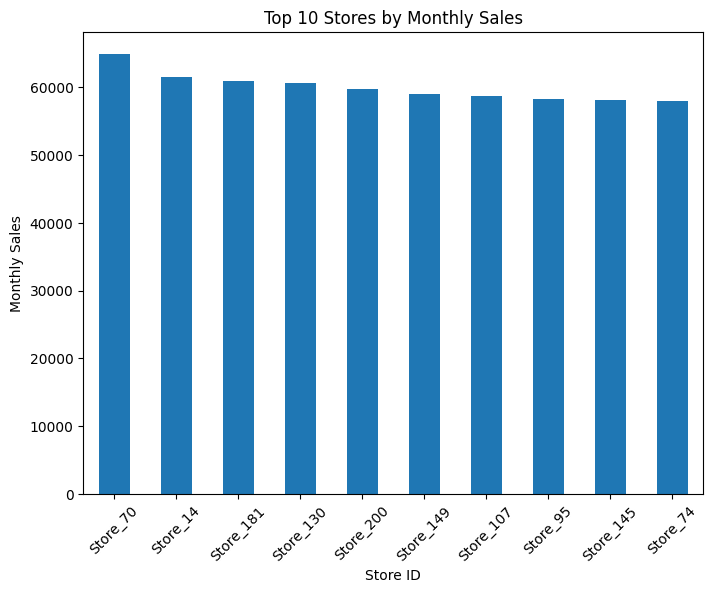

In [ ]:
df_sorted = df.sort_values(by='monthly_sales', ascending=False).head(10)
df_sorted.set_index('store_id')['monthly_sales'].plot(kind='bar')
plt.title("Top 10 Stores by Monthly Sales")
plt.xlabel("Store ID")
plt.ylabel("Monthly Sales")
plt.xticks(rotation=45)
plt.show()


Correlation Heatmap

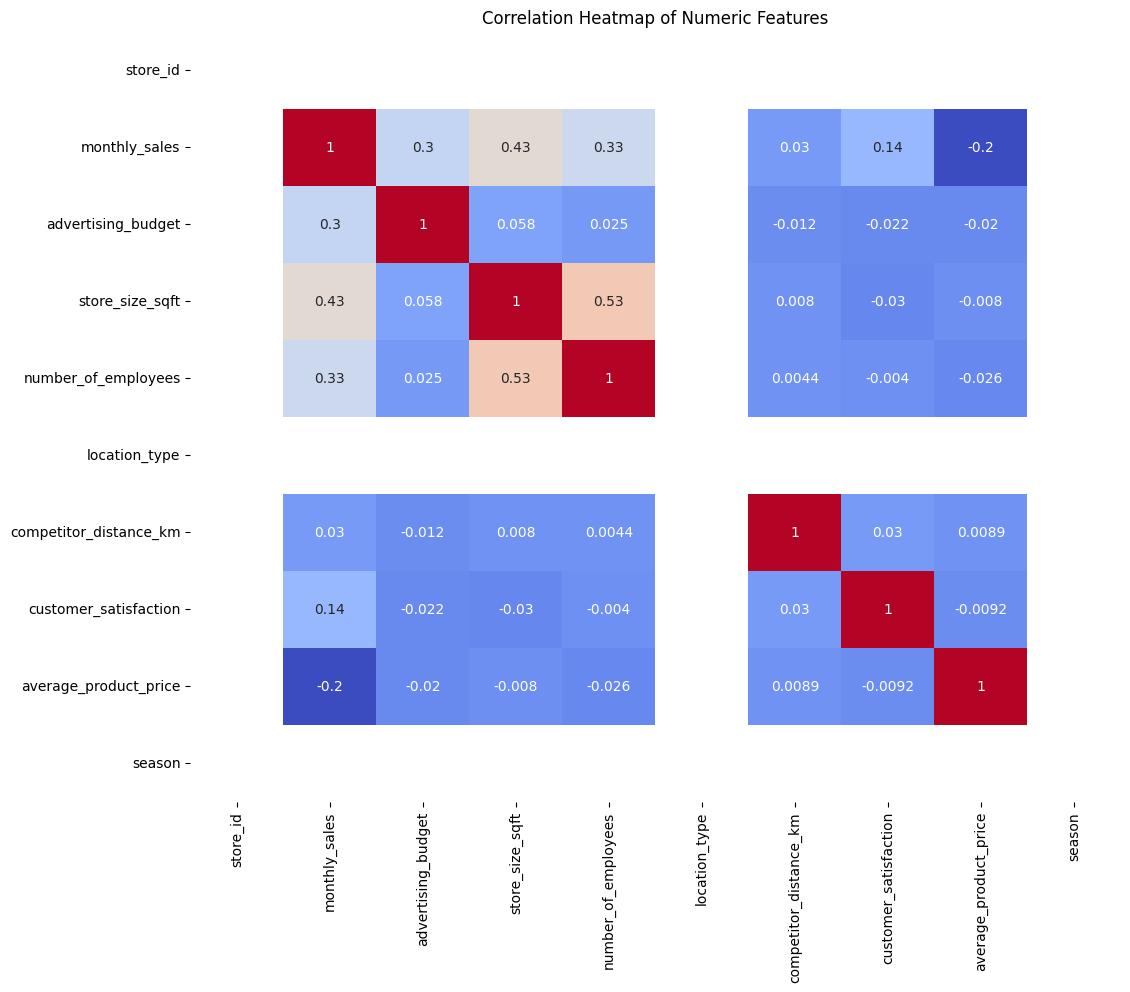

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

# Convert applicable 'object' columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except:
            pass  # Skip columns that cannot be converted

# Keep only numeric columns for the heatmap
numeric_df = df.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sb.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', cbar=False)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [ ]:
df = df.drop('advertising_budget', axis=1)

In [ ]:
df['high_sales'] = [1 if x > 40000 else 0 for x in df['monthly_sales']]


In [ ]:
df.replace({'location_type': {'Urban': 2, 'Suburban': 1, 'Rural': 0}}, inplace=True)


In [ ]:
df = df.drop('store_id', axis=1)  # It's just an ID, not useful for modeling



In [ ]:
df.replace({'location_type': {'Urban': 2, 'Suburban': 1, 'Rural': 0}}, inplace=True)
df.replace({'season': {'Spring': 0, 'Summer': 1, 'Fall': 2, 'Winter': 3}}, inplace=True)


In [ ]:
df['high_sales'] = [1 if x > 40000 else 0 for x in df['monthly_sales']]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

features = df.drop(['monthly_sales', 'high_sales'], axis=1)
features = features.fillna(features.mean())  # Fill NAs before split
target = df['high_sales']

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=40)

# Impute missing values in case any remain
imputer = SimpleImputer(strategy='mean')
xtrain = imputer.fit_transform(xtrain)
xtest = imputer.transform(xtest)

xtrain.shape, xtest.shape



/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['location_type' 'season']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['location_type' 'season']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


((800, 5), (200, 5))

In [ ]:
df.dtypes


,0
monthly_sales,float64
store_size_sqft,float64
number_of_employees,int64
location_type,float64
competitor_distance_km,float64
customer_satisfaction,float64
average_product_price,float64
season,float64
high_sales,int64


In [ ]:
# Convert 'location_type' to numerical values
df['location_type'] = df['location_type'].map({
    'Rural': 0,
    'Suburban': 1,
    'Urban': 2
})

# Convert 'season' to numerical values
df['season'] = df['season'].map({
    'Spring': 0,
    'Summer': 1,
    'Fall': 2,
    'Winter': 3
})


In [ ]:
print(df[['location_type', 'season']].head())
print(df.dtypes)


   location_type  season
0            NaN     NaN
1            NaN     NaN
2            NaN     NaN
3            NaN     NaN
4            NaN     NaN
monthly_sales             float64
store_size_sqft           float64
number_of_employees         int64
location_type             float64
competitor_distance_km    float64
customer_satisfaction     float64
average_product_price     float64
season                    float64
high_sales                  int64
dtype: object


In [ ]:
df['high_sales'] = [1 if x > 40000 else 0 for x in df['monthly_sales']]


In [ ]:
import pandas as pd

# 1. Load the dataset again (after runtime reset)
df = pd.read_excel('/content/retail_sales_data.xlsx')

# 2. Drop identifier column
df = df.drop('store_id', axis=1)

# 3. Encode categorical variables
df['location_type'] = df['location_type'].map({'Rural': 0, 'Suburban': 1, 'Urban': 2})
df['season'] = df['season'].map({'Spring': 0, 'Summer': 1, 'Fall': 2, 'Winter': 3})

# 4. Create target column
df['high_sales'] = [1 if x > 40000 else 0 for x in df['monthly_sales']]

# 5. Define features and target
features = df.drop(['monthly_sales', 'high_sales'], axis=1)
features = features.fillna(features.mean())
target = df['high_sales']

# 6. Train-test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=40)

# 7. Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
xtrain = imputer.fit_transform(xtrain)
xtest = imputer.transform(xtest)

# 8. Check output shape
xtrain.shape, xtest.shape


((800, 8), (200, 8))

In [ ]:
# Install scikit-learn if not already installed
!pip install scikit-learn

# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [ ]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Initialize and train the model
model = LogisticRegression()
model.fit(xtrain, ytrain)

# Predict on training and test data
ytrain_pred = model.predict(xtrain)
ytest_pred = model.predict(xtest)

# Print accuracy scores
print('Training Accuracy:', metrics.accuracy_score(ytrain, ytrain_pred))
print('Validation Accuracy:', metrics.accuracy_score(ytest, ytest_pred))


Training Accuracy: 0.7025
Validation Accuracy: 0.75


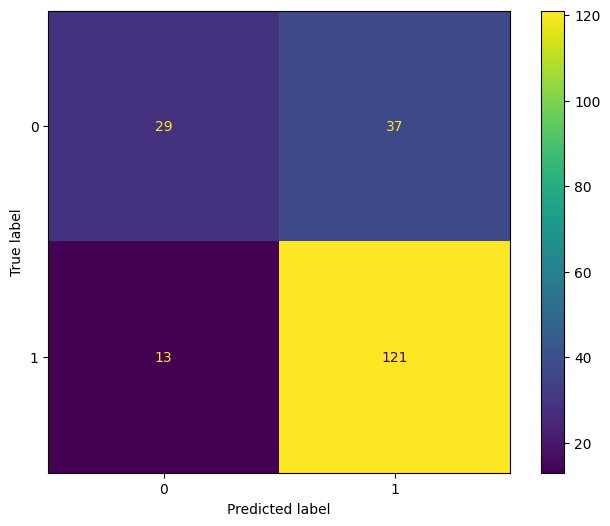

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Assuming 'models[1]' is your train classifier
cm = confusion_matrix(ytest, model.predict(xtest))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
print(metrics.classification_report(ytest,
                                    model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.69      0.44      0.54        66
           1       0.77      0.90      0.83       134

    accuracy                           0.75       200
   macro avg       0.73      0.67      0.68       200
weighted avg       0.74      0.75      0.73       200



In [ ]:
print(metrics.classification_report(ytest,
                                    model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.69      0.44      0.54        66
           1       0.77      0.90      0.83       134

    accuracy                           0.75       200
   macro avg       0.73      0.67      0.68       200
weighted avg       0.74      0.75      0.73       200



Random Forest Accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(xtrain, ytrain)
print("Random Forest Accuracy:", metrics.accuracy_score(ytest, rf_model.predict(xtest)))


Random Forest Accuracy: 0.735


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, model.predict(xtest)))


              precision    recall  f1-score   support

           0       0.69      0.44      0.54        66
           1       0.77      0.90      0.83       134

    accuracy                           0.75       200
   macro avg       0.73      0.67      0.68       200
weighted avg       0.74      0.75      0.73       200



decision tree classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(xtrain, ytrain)

# Predict on training and test sets
ytrain_pred_dt = dt_model.predict(xtrain)
ytest_pred_dt = dt_model.predict(xtest)

# Accuracy scores
print("Decision Tree - Training Accuracy:", metrics.accuracy_score(ytrain, ytrain_pred_dt))
print("Decision Tree - Validation Accuracy:", metrics.accuracy_score(ytest, ytest_pred_dt))


Decision Tree - Training Accuracy: 1.0
Decision Tree - Validation Accuracy: 0.645


confusion matrix


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report (Decision Tree):")
print(classification_report(ytest, ytest_pred_dt))

print("\nConfusion Matrix:")
print(confusion_matrix(ytest, ytest_pred_dt))



Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.47      0.52      0.49        66
           1       0.75      0.71      0.73       134

    accuracy                           0.65       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.65      0.65      0.65       200


Confusion Matrix:
[[34 32]
 [39 95]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_model.fit(xtrain, ytrain)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)